# Installing background stars

In [87]:
from astroquery.gaia import Gaia
from matplotlib import pyplot as plt
import astropy.units as u
import numpy as np

In [96]:
ra = 220.102540961
dec = -60.8330381775

CONICAL_QUERY = """
SELECT
    TOP 12000
    ra, dec, phot_g_mean_flux AS flux
FROM
    gaiadr3.gaia_source
WHERE
    CONTAINS(POINT('', ra, dec), CIRCLE('', {}, {}, {})) = 1 AND
    phot_g_mean_flux IS NOT NULL
"""

bg_stars = Gaia.launch_job(CONICAL_QUERY.format(ra, dec, 3.0)).get_results()
bg_stars = np.delete(bg_stars, np.where(bg_stars['flux'] == bg_stars['flux'].max()), axis=0)
bg_stars = np.delete(bg_stars, np.where(bg_stars['flux'] == bg_stars['flux'].max()), axis=0)

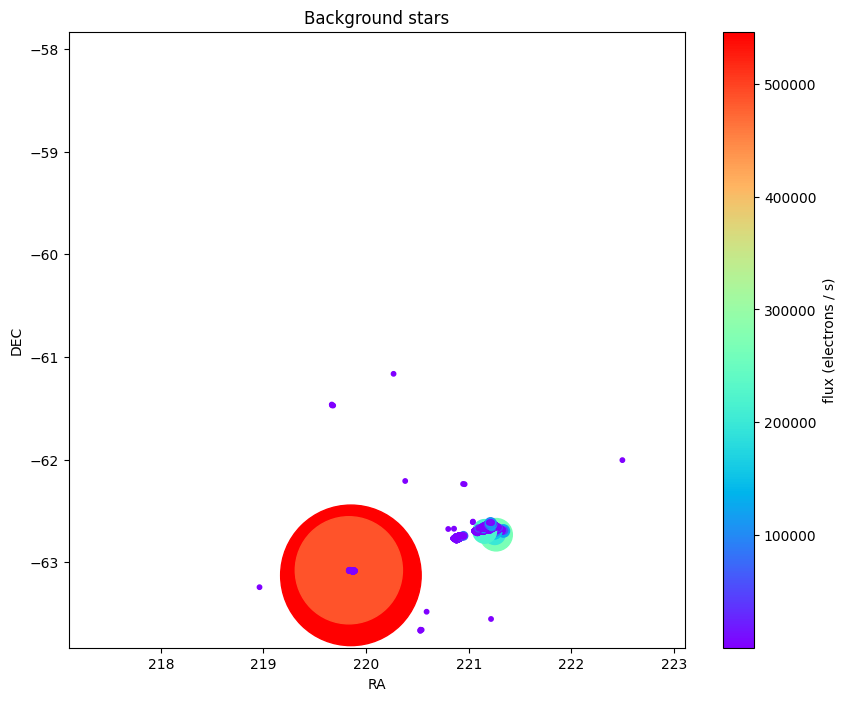

In [97]:
fig, ax = plt.subplots(figsize=(10, 8))
c=ax.scatter(bg_stars['ra'], bg_stars['dec'],
             s= 10 * (1 + bg_stars['flux']/bg_stars['flux'].max())**10,
             c=bg_stars['flux'],
             cmap='rainbow',
             )

ax.set(xlabel='RA',
       ylabel='DEC',
       xlim = (ra-3, ra+3),
       ylim = (dec-3, dec+3),
       title='Background stars',
       aspect = 'equal',
       )

fig.colorbar(c, label='flux (electrons / s)')
plt.show()

In [98]:
import toliman
toliman._simulate_background_stars()

dLux: Jax is running in 32-bit, to enable 64-bit visit: https://jax.readthedocs.io/en/latest/notebooks/Common_Gotchas_in_JAX.html#double-64bit-precision


FileNotFoundError: [Errno 2] No such file or directory: 'toliman/assets'